<blockquote>
    <h1>Exercise 3.13</h1>
    <p>In this exercise you will create some simulated data and will fit simple linear regression models to it. Make sure to use <code>set.seed(1)</code> prior to starting part 1 to ensure consistent results.</p>
    <ol>
        <li>Using the <code>rnorm()</code> function, create a vector, $x$, containing $100$ observations drawn from a $N (0, 1)$ distribution. This represents a feature, $X$.</li>
        <li>Using the <code>rnorm()</code> function, create a vector, $eps$, containing $100$ observations drawn from a $N (0, 0.25)$ distribution i.e. a normal
distribution with mean zero and variance $0.25$.</li>
        <li>Using $x$ and $eps$, generate a vector $y$ according to the model
        $$
            Y = -1 + 0.5X + \epsilon
        $$
        What is the length of the vector $y$? What are the values of $\beta_0$ and $\beta_1$ in this linear model?</li>
        <li>Create a scatterplot displaying the relationship between $x$ and $y$. Comment on what you observe.</li>
        <li>Fit a least squares linear model to predict $y$ using $x$. Comment on the model obtained. How do $\hat{\beta}_0$ and $\hat{\beta}_1$ compare to $\beta_0$ and $\beta_1$?</li>
        <li>Display the least squares line on the scatterplot obtained in 4. Draw the population regression line on the plot, in a different color. Use the <code>legend()</code> command to create an appropriate legend.</li>
        <li>Now fit a polynomial regression model that predicts $y$ using $x$ and $x^2$. Is there evidence that the quadratic term improves the model fit? Explain your answer.</li>
        <li>Repeat 1-6 after modifying the data generation process in such a way that there is <i>less</i> noise in the data. The model (3.39) [see equation in subquestion 2] should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term $\epsilon$ in 2. Describe your results.</li>
        <li>Repeat 1-6 after modifying the data generation process in such a way that there is <i>more</i> noise in the data. The model (3.39) [see equation in subquestion 2] should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term $\epsilon$ in 2. Describe your results.</li>
        <li>What are the confidence intervals for $\beta_0$ and $\beta_1$ based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.</li>
    </ol>
</blockquote>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%run ../../customModules/usefulFunctions.ipynb
# https://stackoverflow.com/questions/34398054/ipython-notebook-cell-multiple-outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import statsmodels.api as sm

<h3>Exercise 3.13.1</h3>
<blockquote>
    <i>Using the <code>rnorm()</code> function, create a vector, $x$, containing $100$ observations drawn from a $N (0, 1)$ distribution. This represents a feature, $X$.</i>
</blockquote>

In [2]:
np.random.seed(0)
n = 100
x = np.random.normal(size=n, loc=0, scale=1)

<h3>Exercise 3.13.2</h3>
<blockquote>
    <i>Using the <code>rnorm()</code> function, create a vector, $eps$, containing $100$ observations drawn from a $N (0, 0.25)$ distribution i.e. a normal
distribution with mean zero and variance $0.25$.</i>
</blockquote>

In [3]:
np.random.seed(1)
eps_variance = 0.25
eps = np.random.normal(size=n, loc=0, scale=eps_variance**0.5)

<h3>Exercise 3.13.3</h3>
<blockquote>
    <i>Using $x$ and $eps$, generate a vector $y$ according to the model
        $$
            Y = -1 + 0.5X + \epsilon
        $$
        What is the length of the vector $y$? What are the values of $\beta_0$ and $\beta_1$ in this linear model?</i>
</blockquote>

<p>This vector will have the same length as $x$ and $eps$, that is $100$, and $\beta_0=-1$ and $\beta_1=0.5$.</p>

In [4]:
y = -1 + 0.5*x + eps

<h3>Exercise 3.13.4</h3>
<blockquote>
    <i>Create a scatterplot displaying the relationship between $x$ and $y$. Comment on what you observe.</i>
</blockquote>

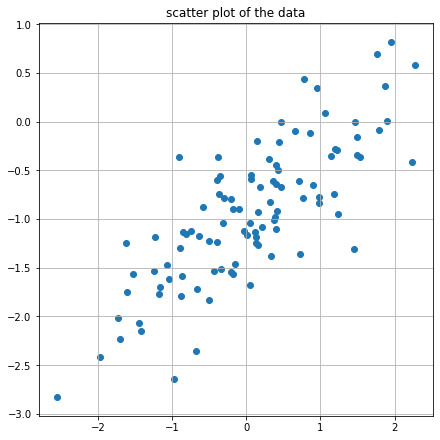

In [5]:
fig, ax = plt.subplots(constrained_layout=True, figsize=(6, 6))
_ = ax.scatter(x, y)
_ = ax.grid(True)
_ = ax.set_title('scatter plot of the data')

<h3>Exercise 3.13.5</h3>
<blockquote>
    <i>Fit a least squares linear model to predict $y$ using $x$. Comment on the model obtained. How do $\hat{\beta}_0$ and $\hat{\beta}_1$ compare to $\beta_0$ and $\beta_1$?</i>
</blockquote>

In [6]:
df_x = pd.DataFrame({'x': x})
df_x.insert(0, 'Intercept', 1)
df_y = pd.DataFrame({'y': y})
model = sm.OLS(df_y, df_x)
fitted_lin_25 = model.fit()
fitted_lin_25.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     166.3
Date:                Tue, 31 Dec 2019   Prob (F-statistic):           7.77e-23
Time:                        16:34:56   Log-Likelihood:                -59.251
No. Observations:                 100   AIC:                             122.5
Df Residuals:                      98   BIC:                             127.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9736      0.044    -21.986      0.000      -1.062      -0.886
x              0.5656      0.044     12.896      0.000       0.479       0.653
==============================================================================
Omnibus:                        0.234   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.890   Jarque-Bera (JB):                0.039
Skew:                          -0.037   Prob(JB):                        0.981
Kurtosis:                       3.063   Cond. No.                         1.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<p>We see that the estimates of the coefficients, that is, $\hat{\beta}_0 = -0.97$ and $\hat{\beta}_1 = 0.57$, approximate the true coefficients used to generate this data, i.e., $\beta_0=-1$ and $\beta_1=0.5$. This discrepency is due to the noise $\epsilon$.</p>

<h3>Exercise 3.13.6</h3>
<blockquote>
    <i>Display the least squares line on the scatterplot obtained in 4. Draw the population regression line on the plot, in a different color. Use the <code>legend()</code> command to create an appropriate legend.</i>
</blockquote>

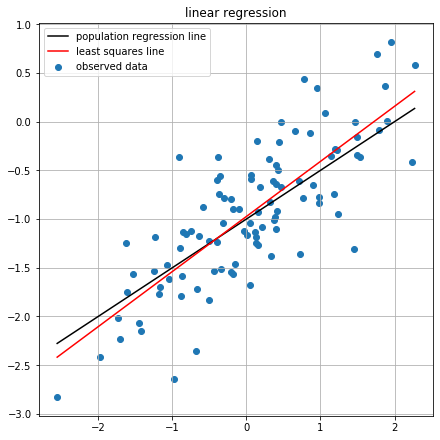

In [7]:
x_population = np.linspace(start=x.min(), stop=x.max(), num=x.shape[0])
y_population = -1 + 0.5*x_population
x_population_pred = pd.DataFrame({
    'Intercept': np.ones(x.shape, dtype=int), 
    'x': x_population
}, columns = ['Intercept', 'x'])
y_population_pred = fitted_lin_25.predict(x_population_pred)

fig, ax = plt.subplots(constrained_layout=True, figsize=(6, 6))
_ = ax.scatter(x, y, label='observed data')
_ = ax.plot(x_population, y_population, color='black', label='population regression line')
_ = ax.plot(x_population, y_population_pred, '-', color='red', label='least squares line')
_ = ax.legend()
_ = ax.grid(True)
_ = ax.set_title('linear regression')

<h3>Exercise 3.13.7</h3>
<blockquote>
    <i>Now fit a polynomial regression model that predicts $y$ using $x$ and $x^2$. Is there evidence that the quadratic term improves the model fit? Explain your answer.</i>
</blockquote>

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     82.90
Date:                Tue, 31 Dec 2019   Prob (F-statistic):           1.02e-21
Time:                        16:34:57   Log-Likelihood:                -59.023
No. Observations:                 100   AIC:                             124.0
Df Residuals:                      97   BIC:                             131.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9505      0.056    -16.869      0.000      -1.062      -0.839
x              0.5685      0.044     12.863      0.000       0.481       0.656
x_squared     -0.0228      0.034     -0.667      0.507      -0.091       0.045
==============================================================================
Omnibus:                        0.222   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.895   Jarque-Bera (JB):                0.032
Skew:                          -0.032   Prob(JB):                        0.984
Kurtosis:                       3.060   Cond. No.                         2.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

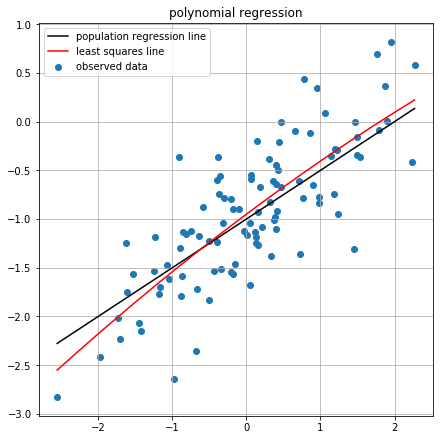

In [8]:
df_x['x_squared'] = df_x['x']**2
model = sm.OLS(df_y, df_x)
fitted_pol_25 = model.fit()
fitted_pol_25.summary()

x_population = np.linspace(start=x.min(), stop=x.max(), num=x.shape[0])
y_population = -1 + 0.5*x_population
x_population_pred = pd.DataFrame({
    'Intercept': np.ones(x.shape, dtype=int), 
    'x': x_population,
    'x_squared': x_population**2,
}, columns = ['Intercept', 'x', 'x_squared'])
y_population_pred = fitted_pol_25.predict(x_population_pred)

fig, ax = plt.subplots(constrained_layout=True, figsize=(6, 6))
_ = ax.scatter(x, y, label='observed data')
_ = ax.plot(x_population, y_population, color='black', label='population regression line')
_ = ax.plot(x_population, y_population_pred, '-', color='red', label='least squares line')
_ = ax.legend()
_ = ax.grid(True)
_ = ax.set_title('polynomial regression')

<p>We see that the (adjusted) $R^2$ has has pretty much remained constant. Thus, both models explain the given data equally well. This is because the polynomial model estimates the coefficient of the $x^2$ variable to be close to zero, hence resulting in an approximately linear model. Note, the $F$-statistic for the polynomial model is significantly smaller and the $p$ value of the coefficient of the $x^2$ variable is very large, indicating that the extra variable $x^2$ likely doesn't explain a significant part of the model.</p>

<h3>Exercise 3.13.8</h3>
<blockquote>
    <i>Repeat 1-6 after modifying the data generation process in such a way that there is <i>less</i> noise in the data. The model (3.39) [see equation in subquestion 2] should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term $\epsilon$ in 2. Describe your results.</i>
</blockquote>

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     3422.
Date:                Tue, 31 Dec 2019   Prob (F-statistic):           5.04e-78
Time:                        16:34:57   Log-Likelihood:                 101.69
No. Observations:                 100   AIC:                            -199.4
Df Residuals:                      98   BIC:                            -194.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9947      0.009   -112.314      0.000      -1.012      -0.977
x              0.5131      0.009     58.496      0.000       0.496       0.531
==============================================================================
Omnibus:                        0.234   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.890   Jarque-Bera (JB):                0.039
Skew:                          -0.037   Prob(JB):                        0.981
Kurtosis:                       3.063   Cond. No.                         1.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     1701.
Date:                Tue, 31 Dec 2019   Prob (F-statistic):           2.97e-76
Time:                        16:34:57   Log-Likelihood:                 101.92
No. Observations:                 100   AIC:                            -197.8
Df Residuals:                      97   BIC:                            -190.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9901      0.011    -87.860      0.000      -1.012      -0.968
x              0.5137      0.009     58.120      0.000       0.496       0.531
x_squared     -0.0046      0.007     -0.667      0.507      -0.018       0.009
==============================================================================
Omnibus:                        0.222   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.895   Jarque-Bera (JB):                0.032
Skew:                          -0.032   Prob(JB):                        0.984
Kurtosis:                       3.060   Cond. No.                         2.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

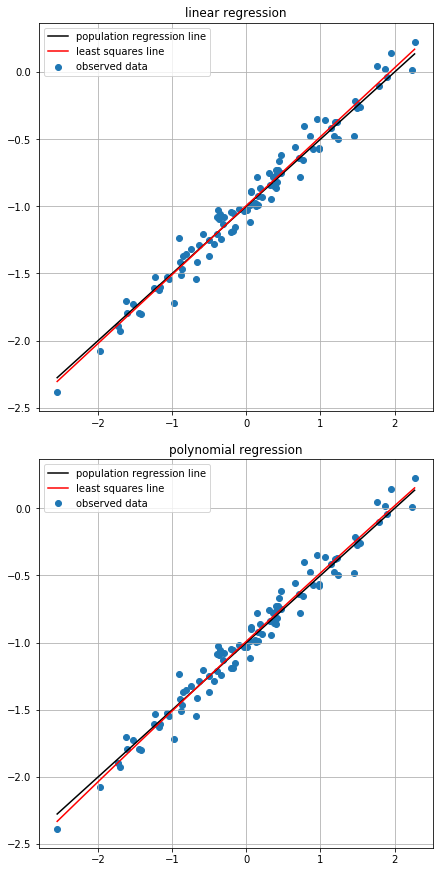

In [9]:
np.random.seed(0)
n = 100
x = np.random.normal(size=n, loc=0, scale=1)

np.random.seed(1)
eps_variance = 0.01
eps = np.random.normal(size=n, loc=0, scale=eps_variance**0.5)
y = -1 + 0.5*x + eps


# simple linear regression
df_x = pd.DataFrame({'x': x})
df_x.insert(0, 'Intercept', 1)
df_y = pd.DataFrame({'y': y})
model = sm.OLS(df_y, df_x)
fitted_lin_1 = model.fit()
fitted_lin_1.summary()

x_population = np.linspace(start=x.min(), stop=x.max(), num=x.shape[0])
y_population = -1 + 0.5*x_population
x_population_pred = pd.DataFrame({
    'Intercept': np.ones(x.shape, dtype=int), 
    'x': x_population
}, columns = ['Intercept', 'x'])
y_population_pred = fitted_lin_1.predict(x_population_pred)

fig, axes = plt.subplots(2, 1, constrained_layout=True, figsize=(6, 12))
_ = axes[0].scatter(x, y, label='observed data')
_ = axes[0].plot(x_population, y_population, color='black', label='population regression line')
_ = axes[0].plot(x_population, y_population_pred, '-', color='red', label='least squares line')
_ = axes[0].legend()
_ = axes[0].grid(True)
_ = axes[0].set_title('linear regression')


# polynomial regression
df_x['x_squared'] = df_x['x']**2
model = sm.OLS(df_y, df_x)
fitted_pol_1 = model.fit()
fitted_pol_1.summary()

x_population_pred.insert(2, 'x_squared', x_population**2)
y_population_pred = fitted_pol_1.predict(x_population_pred)

# fig, ax = plt.subplots(constrained_layout=True, figsize=(6, 6))
_ = axes[1].scatter(x, y, label='observed data')
_ = axes[1].plot(x_population, y_population, color='black', label='population regression line')
_ = axes[1].plot(x_population, y_population_pred, '-', color='red', label='least squares line')
_ = axes[1].legend()
_ = axes[1].grid(True)
_ = axes[1].set_title('polynomial regression')

<h3>Exercise 3.13.9</h3>
<blockquote>
    <i>Repeat 1-6 after modifying the data generation process in such a way that there is <i>more</i> noise in the data. The model (3.39) [see equation in subquestion 2] should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term $\epsilon$ in 2. Describe your results.</i>
</blockquote>

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     56.31
Date:                Tue, 31 Dec 2019   Prob (F-statistic):           2.85e-11
Time:                        16:34:57   Log-Likelihood:                -123.30
No. Observations:                 100   AIC:                             250.6
Df Residuals:                      98   BIC:                             255.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9500      0.084    -11.306      0.000      -1.117      -0.783
x              0.6245      0.083      7.504      0.000       0.459       0.790
==============================================================================
Omnibus:                        0.234   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.890   Jarque-Bera (JB):                0.039
Skew:                          -0.037   Prob(JB):                        0.981
Kurtosis:                       3.063   Cond. No.                         1.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     28.22
Date:                Tue, 31 Dec 2019   Prob (F-statistic):           2.19e-10
Time:                        16:34:58   Log-Likelihood:                -123.07
No. Observations:                 100   AIC:                             252.1
Df Residuals:                      97   BIC:                             260.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9061      0.107     -8.475      0.000      -1.118      -0.694
x              0.6299      0.084      7.512      0.000       0.463       0.796
x_squared     -0.0434      0.065     -0.667      0.507      -0.172       0.086
==============================================================================
Omnibus:                        0.222   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.895   Jarque-Bera (JB):                0.032
Skew:                          -0.032   Prob(JB):                        0.984
Kurtosis:                       3.060   Cond. No.                         2.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

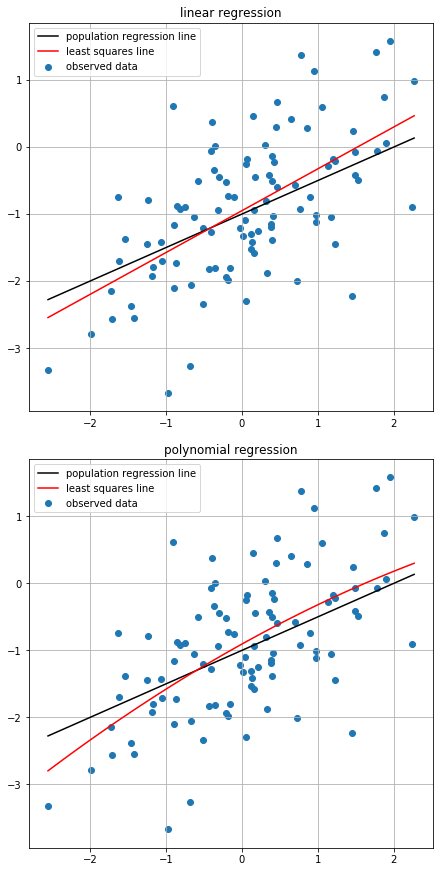

In [10]:
np.random.seed(0)
n = 100
x = np.random.normal(size=n, loc=0, scale=1)

np.random.seed(1)
eps_variance = 0.9
eps = np.random.normal(size=n, loc=0, scale=eps_variance**0.5)
y = -1 + 0.5*x + eps


# simple linear regression
df_x = pd.DataFrame({'x': x})
df_x.insert(0, 'Intercept', 1)
df_y = pd.DataFrame({'y': y})
model = sm.OLS(df_y, df_x)
fitted_lin_90 = model.fit()
fitted_lin_90.summary()

x_population = np.linspace(start=x.min(), stop=x.max(), num=x.shape[0])
y_population = -1 + 0.5*x_population
x_population_pred = pd.DataFrame({
    'Intercept': np.ones(x.shape, dtype=int), 
    'x': x_population
}, columns = ['Intercept', 'x'])
y_population_pred = fitted_lin_90.predict(x_population_pred)

fig, axes = plt.subplots(2, 1, constrained_layout=True, figsize=(6, 12))
_ = axes[0].scatter(x, y, label='observed data')
_ = axes[0].plot(x_population, y_population, color='black', label='population regression line')
_ = axes[0].plot(x_population, y_population_pred, '-', color='red', label='least squares line')
_ = axes[0].legend()
_ = axes[0].grid(True)
_ = axes[0].set_title('linear regression')


# polynomial regression
df_x['x_squared'] = df_x['x']**2
model = sm.OLS(df_y, df_x)
fitted_pol_90 = model.fit()
fitted_pol_90.summary()

x_population_pred.insert(2, 'x_squared', x_population**2)
y_population_pred = fitted_pol_90.predict(x_population_pred)

_ = axes[1].scatter(x, y, label='observed data')
_ = axes[1].plot(x_population, y_population, color='black', label='population regression line')
_ = axes[1].plot(x_population, y_population_pred, '-', color='red', label='least squares line')
_ = axes[1].legend()
_ = axes[1].grid(True)
_ = axes[1].set_title('polynomial regression')

<p>The data with less noise result in a higher (adjusted) $R^2$, which is expected because the less noise means that the model can explain more of the response variable. Also note that for all the polynomial fits described above, the coefficient associated with $x^2$ is estimated to be close to zero.</p>

<h3>Exercise 3.13.10</h3>
<blockquote>
    <i>What are the confidence intervals for $\beta_0$ and $\beta_1$ based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.</i>
</blockquote>

<p>Both linear and polynomial models yield a very small $p$ value for $\hat{\beta_0}$ and $\hat{\beta_1}$, indicating a strong relationship with the response variable.</p>